In [2]:
# Import libraries
import numpy as np
import pandas as pd
from obspy import read
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os
from ipywidgets import Button, VBox, HBox, Output, Label
from IPython.display import display
import glob

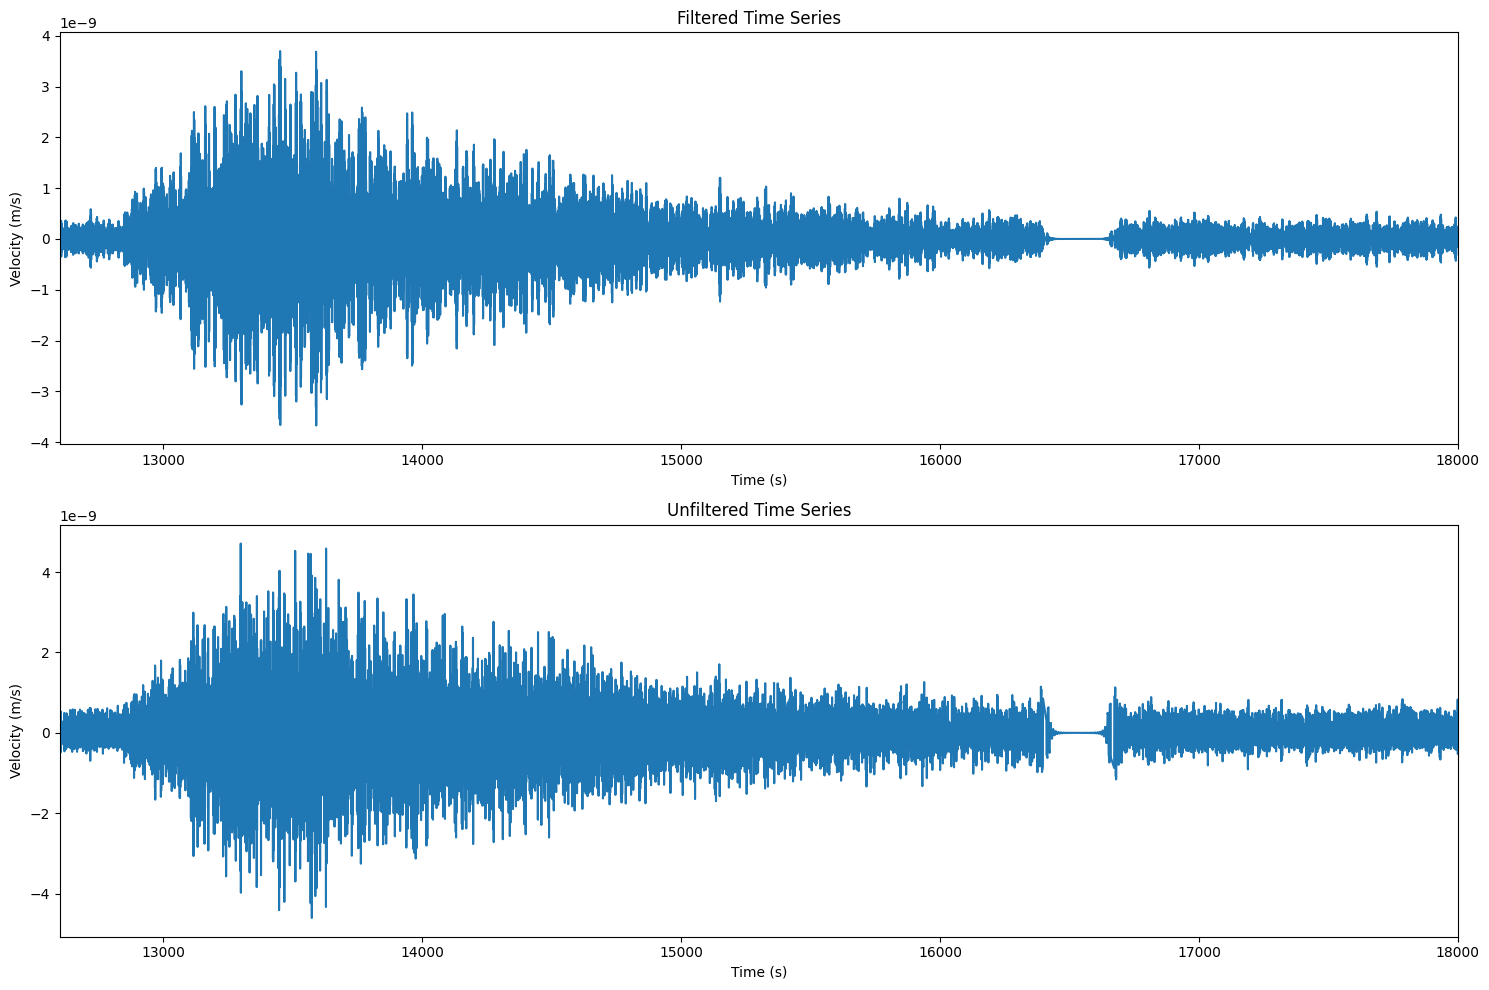

In [10]:
# Step 1: Load all CSV files
mseed_files = sorted(glob.glob('./data/lunar/training/data/S12_GradeA/*.mseed'))
#mseed_files = sorted(glob.glob('./data/lunar/test/data/S15_GradeA/*.mseed'))
# Step 2: Define function to load CSV file
def load_mseed(file_idx):
    st = read(mseed_files[file_idx])
    return st, mseed_files[file_idx]

current_file_idx = 1
st, filename = load_mseed(current_file_idx)

# This is how you get the data and the time, which is in seconds
tr = st[0].copy()
sampling_rate = tr.stats.sampling_rate  # Sampling rate in Hz (samples per second)
tr_times = tr.times()
starting_cut = int(sampling_rate * 3.5 * 3600)
ending_cut = int(sampling_rate * 19 * 3600)
tr_times = tr_times[starting_cut:-ending_cut]
tr_data = tr.data
tr_data = tr_data[starting_cut:-ending_cut]

# Set the minimum frequency
minfreq = 0.7
maxfreq = 1.0

# Going to create a separate trace for the filter data
st_filt = st.copy()
st_filt.filter('bandpass',freqmin=minfreq,freqmax=maxfreq)
tr_filt = st_filt.traces[0].copy()
tr_times_filt = tr_filt.times()
tr_data_filt = tr_filt.data
tr_data_filt = tr_data_filt[starting_cut:-ending_cut]
tr_times_filt = tr_times_filt[starting_cut:-ending_cut]


# To better see the patterns, we will create a spectrogram using the scipy function
# It requires the sampling rate, which we can get from the miniseed header as shown a few cells above
from scipy import signal
from matplotlib import cm
f, t, sxx = signal.spectrogram(tr_data_filt, tr_filt.stats.sampling_rate)
fu, tu, sxxu = signal.spectrogram(tr_data, tr.stats.sampling_rate)

# Create a figure with a 2x2 grid of subplots
fig, axs = plt.subplots(2, 1, figsize=(15, 10))

# Plot filtered trace in the first column of the first row
axs[0].plot(tr_times_filt, tr_data_filt)
axs[0].set_xlim([min(tr_times_filt), max(tr_times_filt)])
axs[0].set_ylabel('Velocity (m/s)')
axs[0].set_xlabel('Time (s)')
axs[0].set_title('Filtered Time Series')


# Plot unfiltered trace in the second column of the first row
axs[1].plot(tr_times, tr_data)
axs[1].set_xlim([min(tr_times), max(tr_times)])
axs[1].set_ylabel('Velocity (m/s)')
axs[1].set_xlabel('Time (s)')
axs[1].set_title('Unfiltered Time Series')



# Adjust layout
plt.tight_layout()
plt.show()

In [11]:
# Load the MiniSEED file and get the trace
st, filename = load_mseed(current_file_idx)

# Get the trace and its stats
tr = st.traces[0].copy()
trace_stats = tr.stats

# Print the stats to see the channel information
print(trace_stats)

# Access specific information like the channel
channel = trace_stats.channel
print(f"Channel: {channel}")
print(st)

         network: XA
         station: S12
        location: 00
         channel: MHZ
       starttime: 1970-03-25T00:00:00.440000Z
         endtime: 1970-03-26T00:00:01.949434Z
   sampling_rate: 6.625
           delta: 0.1509433962264151
            npts: 572411
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 1136, 'encoding': 'FLOAT64', 'byteorder': '>', 'record_length': 4096, 'filesize': 4653056})
Channel: MHZ
1 Trace(s) in Stream:
XA.S12.00.MHZ | 1970-03-25T00:00:00.440000Z - 1970-03-26T00:00:01.949434Z | 6.6 Hz, 572411 samples


In [12]:
data_directory = './data/sahara/II.MBAR.10.BHZ_2023-10-26T19_01_51.076_2023-10-26T19_04_26.076.mseed'
st = read(data_directory)
st

1 Trace(s) in Stream:
II.MBAR.10.BHZ | 2023-10-26T19:01:51.094536Z - 2023-10-26T19:04:26.069536Z | 40.0 Hz, 6200 samples

In [14]:
tr = st.traces[0].copy()
trace_stats = tr.stats
print(trace_stats)

         network: II
         station: MBAR
        location: 10
         channel: BHZ
       starttime: 2023-10-26T19:01:51.094536Z
         endtime: 2023-10-26T19:04:26.069536Z
   sampling_rate: 40.0
           delta: 0.025
            npts: 6200
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'M', 'number_of_records': 4, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 16384})


C:\Users\chali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\obspy\signal\filter.py:62: UserWarning: Selected high corner frequency (10) of bandpass is at or above Nyquist (3.3125). Applying a high-pass instead.
  warnings.warn(msg)


6.625
6.625
6.625
6.625
6.625
6.625
6.625
6.625
6.625


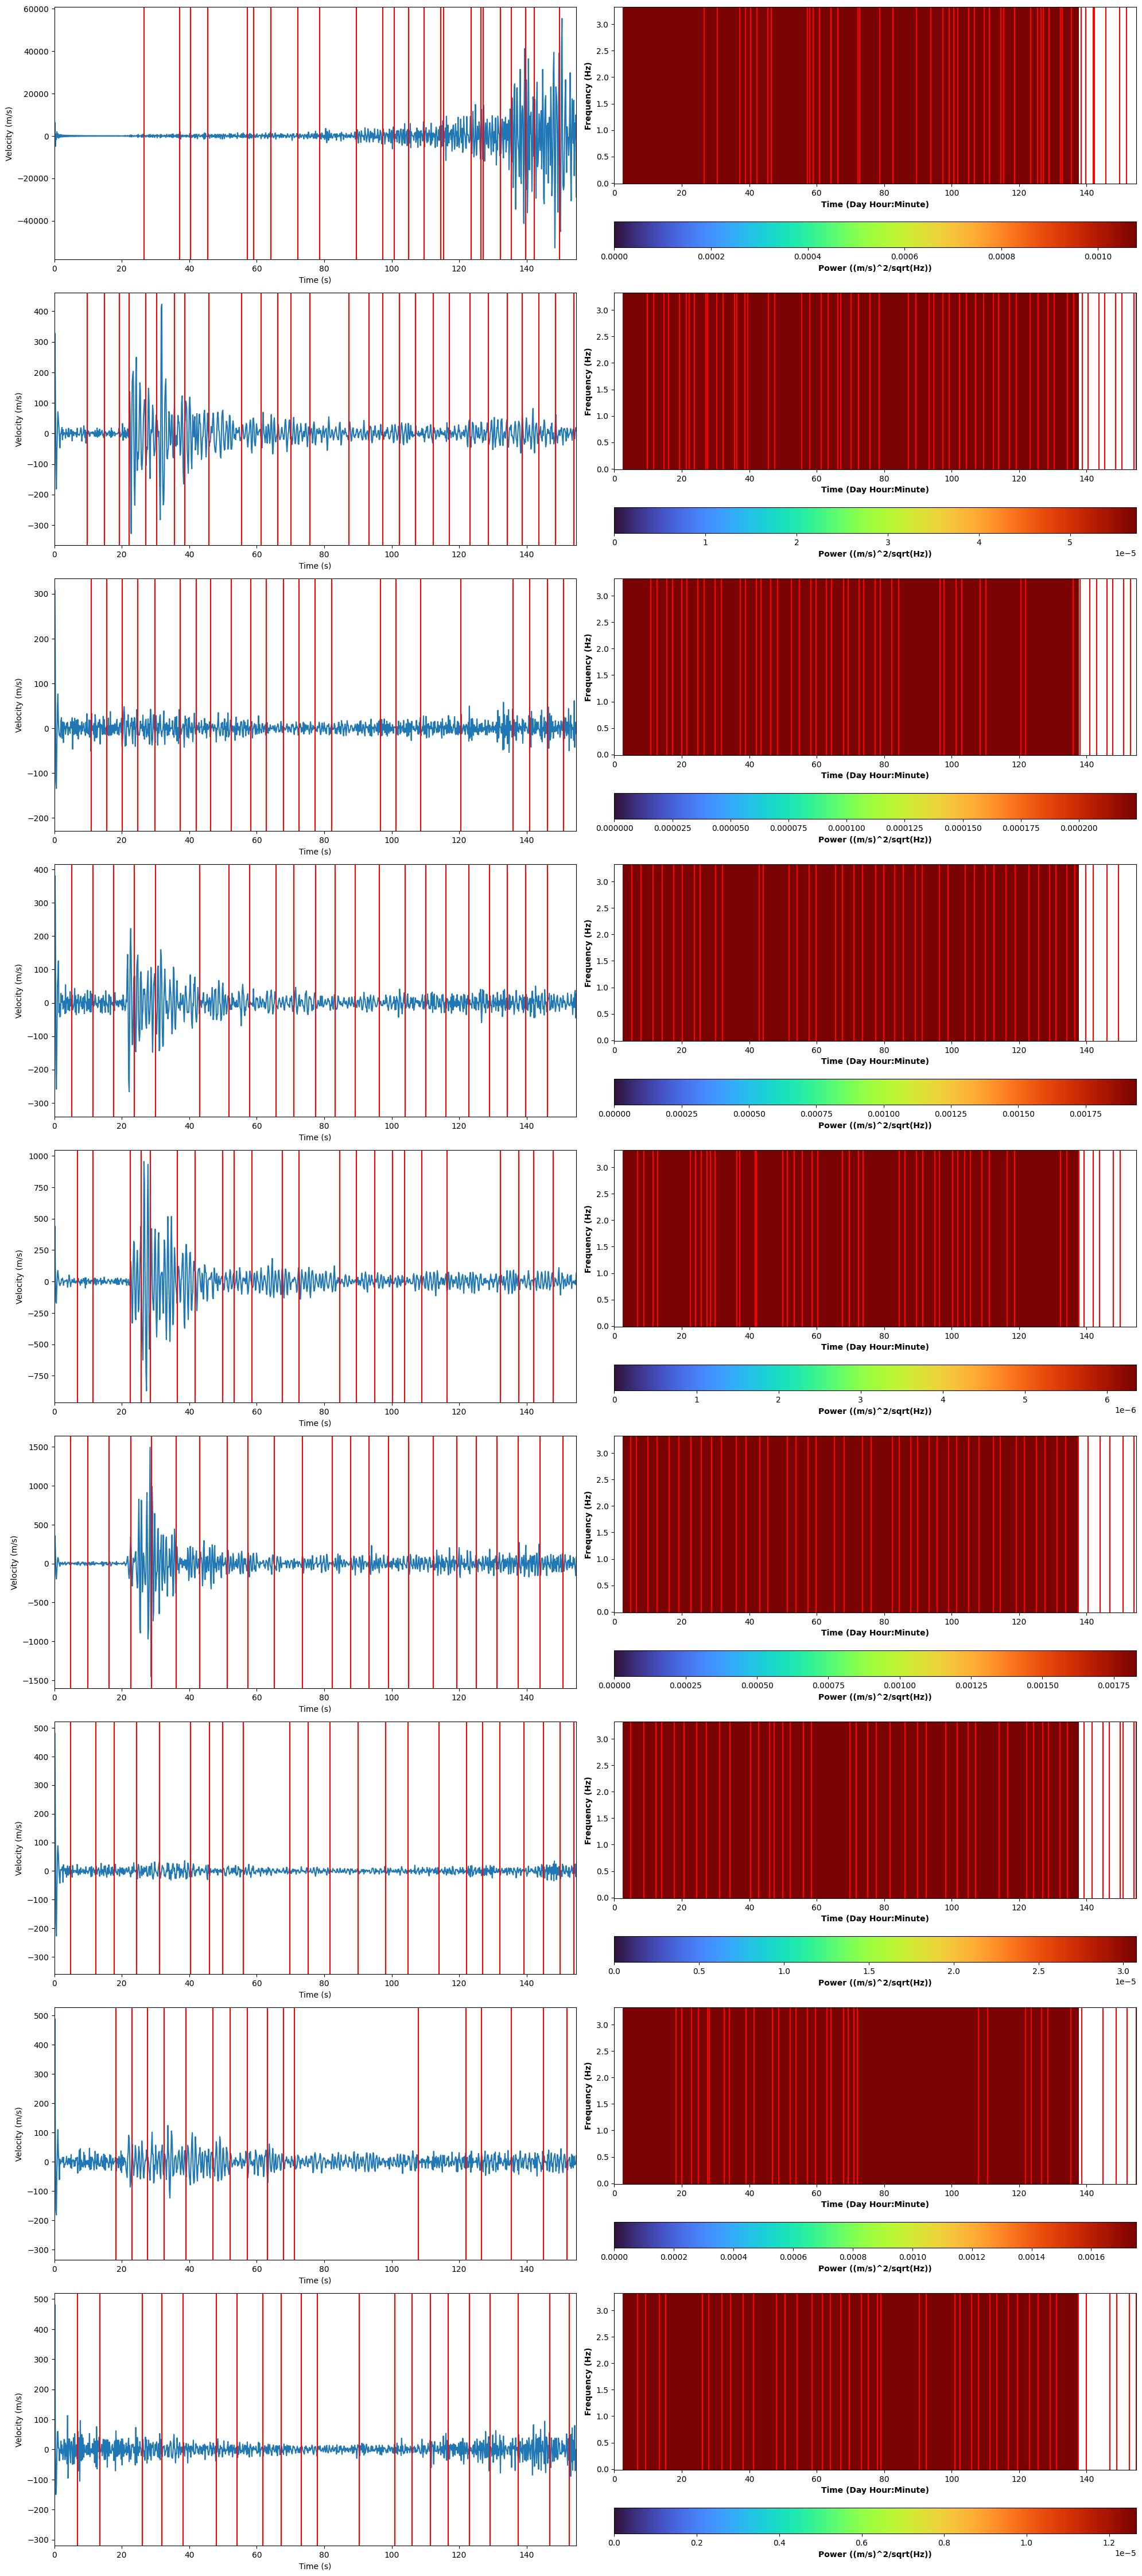

In [35]:
mseed_files = sorted(glob.glob('./data/sahara/*.mseed'))

current_file_idx = 0

num_files_to_display = len(mseed_files)

# Create a vertical plot layout based on the number of files (each file gets 4 plots)
fig, axs = plt.subplots(num_files_to_display, 2, figsize=(20, 5 * num_files_to_display))

for i in range(num_files_to_display):
    # Load the MiniSEED file
    st, filename = load_mseed(current_file_idx + i)  # Incrementing file index
    # Extract the evid part from the filename
    
    tr = st.traces[0].copy()
    tr.resample(sampling_rate=6.625)

    tr_times = tr.times()
    tr_data = tr.data

    # Define the frequency range for the bandpass filter
    minfreq = 1
    maxfreq = 10

    # ============================Apply the filter
    st_filt = st.copy()
    st_filt.resample(sampling_rate=6.625)
    st_filt.filter('bandpass', freqmin=minfreq, freqmax=maxfreq)
    tr_filt = st_filt.traces[0].copy()
    tr_times_filt = tr_filt.times()
    tr_data_filt = tr_filt.data

    # ============================Compute spectrograms
    f, t, sxx = signal.spectrogram(tr_data_filt, tr_filt.stats.sampling_rate)
    fu, tu, sxxu = signal.spectrogram(tr_data, tr.stats.sampling_rate)



    #================================performing STA/LTA
    from obspy.signal.invsim import cosine_taper
    from obspy.signal.filter import highpass
    from obspy.signal.trigger import classic_sta_lta, plot_trigger, trigger_onset

    # Sampling frequency of our trace
    df = tr.stats.sampling_rate
    print(df)

    # How long should the short-term and long-term window be, in seconds?
    sta_len = 2
    lta_len = 5

    tr_data_abs = np.abs(tr_data)

    # Run Obspy's STA/LTA to obtain a characteristic function
    cft = classic_sta_lta(tr_data_abs, int(sta_len * df), int(lta_len * df))

    thr_on = 1.25
    thr_off = 1
    on_off = np.array(trigger_onset(cft, thr_on, thr_off))


    # Plot filtered trace in the first column
    axs[i, 0].plot(tr_times, tr_data_filt)
    axs[i, 0].set_xlim([min(tr_times), max(tr_times)])
    axs[i, 0].set_ylabel('Velocity (m/s)')
    axs[i, 0].set_xlabel('Time (s)')
    for j in np.arange(0,len(on_off)):
        triggers = on_off[j]
        axs[i, 0].axvline(x = tr_times[triggers[0]], color='red', label='Trig. On')
        #axs[i, 0].axvline(x = tr_times[triggers[1]], color='red', label='Trig. Off')


    # # Plot characteristic function
    # axs[i,1].plot(tr_times,cft)
    # axs[i,1].set_xlim([min(tr_times),max(tr_times)])
    # axs[i,1].set_xlabel('Time (s)')
    # axs[i,1].set_ylabel('Characteristic function')

    # Plot spectrogram for filtered data in the second column
    vals = axs[i, 1].pcolormesh(t, f, sxx, cmap='turbo', vmax=5e-17)
    axs[i, 1].set_xlim([min(tr_times_filt), max(tr_times_filt)])
    axs[i, 1].set_xlabel('Time (Day Hour:Minute)', fontweight='bold')
    axs[i, 1].set_ylabel('Frequency (Hz)', fontweight='bold')
    cbar = plt.colorbar(vals, ax=axs[i, 1], orientation='horizontal')
    cbar.set_label('Power ((m/s)^2/sqrt(Hz))', fontweight='bold')
    for j in np.arange(0,len(on_off)):
        triggers = on_off[j]
        axs[i, 1].axvline(x = tr_times_filt[triggers[0]], color='red', label='Trig. On')
        axs[i, 1].axvline(x = tr_times_filt[triggers[1]], color='red', label='Trig. Off')


# Adjust layout for better spacing
plt.tight_layout()
plt.show()